In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import ttest_ind, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = '/content/insurance_data.csv'
data = pd.read_csv(url)
print("Initial Data Info:")
print(data.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   TRANSACTION_ID            10000 non-null  object 
 2   CUSTOMER_ID               10000 non-null  object 
 3   POLICY_NUMBER             10000 non-null  object 
 4   POLICY_EFF_DT             10000 non-null  object 
 5   LOSS_DT                   10000 non-null  object 
 6   REPORT_DT                 10000 non-null  object 
 7   INSURANCE_TYPE            10000 non-null  object 
 8   PREMIUM_AMOUNT            10000 non-null  float64
 9   CLAIM_AMOUNT              10000 non-null  int64  
 10  CUSTOMER_NAME             10000 non-null  object 
 11  ADDRESS_LINE1             10000 non-null  object 
 12  ADDRESS_LINE2             1495 non-null   object 
 13  CITY                      9946 non-null   o

In [ ]:
# Descriptive Statistics
print(data.describe())  # Provides summary statistics (mean, std, min, max, etc.)
print(data.describe(include=['object']))  # If you have categorical columns

       PREMIUM_AMOUNT   CLAIM_AMOUNT   POSTAL_CODE           AGE  \
count    10000.000000   10000.000000  10000.000000  10000.000000   
mean        88.508595   16563.830000  48288.830500     44.466100   
std         48.315874   22037.489735  32467.389801     11.516827   
min          6.000000     100.000000   1001.000000     25.000000   
25%         62.015000    2000.000000  21061.000000     34.000000   
50%         88.835000    7000.000000  37206.000000     45.000000   
75%        121.902500   21000.000000  80004.000000     54.000000   
max        200.000000  100000.000000  99669.000000     64.000000   

             TENURE  NO_OF_FAMILY_MEMBERS  ROUTING_NUMBER    ANY_INJURY  \
count  10000.000000          10000.000000    1.000000e+04  10000.000000   
mean      62.949800              4.488400    7.052882e+07      0.699100   
std       32.890604              1.712588    3.451879e+07      0.458672   
min        6.000000              2.000000    1.000074e+07      0.000000   
25%       34

# **Data Preprocessing**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TXN_DATE_TIME                  0
TRANSACTION_ID                 0
CUSTOMER_ID                    0
POLICY_NUMBER                  0
POLICY_EFF_DT                  0
LOSS_DT                        0
REPORT_DT                      0
INSURANCE_TYPE                 0
PREMIUM_AMOUNT                 0
CLAIM_AMOUNT                   0
CUSTOMER_NAME                  0
ADDRESS_LINE1                  0
ADDRESS_LINE2               8505
CITY                          54
STATE                          0
POSTAL_CODE                    0
SSN                            0
MARITAL_STATUS                 0
AGE                            0
TENURE                         0
EMPLOYMENT_STATUS              0
NO_OF_FAMILY_MEMBERS           0
RISK_SEGMENTATION              0
HOUSE_TYPE                     0
SOCIAL_CLASS                   0
ROUTING_NUMBER                 0
ACCT_NUMBER                    0
CUSTOMER_EDUCATION_LEVEL     529
CLAIM_STATUS                   0
INCIDENT_SEVERITY         

**Data Cleaning**

In [ ]:
# drop missing values i.e. drop if more than 50% missing
data = data.dropna(thresh=len(data) * 0.5, axis=1)

# Remove duplicate
data = data.drop_duplicates()

# Remove unnecessary columns
columns_to_drop = [
    'TRANSACTION_ID',
    'CUSTOMER_ID',
    'AGENT_ID',
    'CUSTOMER_NAME',
    'ADDRESS_LINE1',
    'ADDRESS_LINE2',
    'CITY',
    'STATE',
    'POSTAL_CODE',
    'SSN',
    'POLICY_EFF_DT',
    'REPORT_DT',
    'AUTHORITY_CONTACTED',
    'ROUTING_NUMBER',
    'ACCT_NUMBER',
    'VENDOR_ID'
]
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Confirm changes
print("Data Info After Cleaning:")
print(data.info())

Data Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TXN_DATE_TIME             10000 non-null  object 
 1   POLICY_NUMBER             10000 non-null  object 
 2   LOSS_DT                   10000 non-null  object 
 3   INSURANCE_TYPE            10000 non-null  object 
 4   PREMIUM_AMOUNT            10000 non-null  float64
 5   CLAIM_AMOUNT              10000 non-null  int64  
 6   MARITAL_STATUS            10000 non-null  object 
 7   AGE                       10000 non-null  int64  
 8   TENURE                    10000 non-null  int64  
 9   EMPLOYMENT_STATUS         10000 non-null  object 
 10  NO_OF_FAMILY_MEMBERS      10000 non-null  int64  
 11  RISK_SEGMENTATION         10000 non-null  object 
 12  HOUSE_TYPE                10000 non-null  object 
 13  SOCIAL_CLASS              10000 non-

**Data Transformation**

In [ ]:
# Categorical Encoding
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
# Store the label encoder for later use
    label_encoders[col] = le

# Display transformed data
print("Transformed Data Head:")
print(data.head())

Transformed Data Head:
   TXN_DATE_TIME  POLICY_NUMBER  LOSS_DT  INSURANCE_TYPE  PREMIUM_AMOUNT  \
0              0           8467        4               0          157.13   
1              0           9593        1               4          141.71   
2              0           7968        9               4          157.24   
3              0           9291        2               0          172.87   
4              0            203        5               5           88.53   

   CLAIM_AMOUNT  MARITAL_STATUS  AGE  TENURE  EMPLOYMENT_STATUS  ...  \
0          9000               1   54      89                  1  ...   
1         26000               0   61      80                  1  ...   
2         13000               0   47      68                  1  ...   
3         16000               1   36      16                  1  ...   
4          3000               1   51      16                  1  ...   

   HOUSE_TYPE  SOCIAL_CLASS  CUSTOMER_EDUCATION_LEVEL  CLAIM_STATUS  \
0           1   

**Feature Engineering**

In [ ]:
# Feature Engineering
# Claim frequency based on policy number
data['claim_frequency'] = data.groupby('POLICY_NUMBER')['CLAIM_AMOUNT'].transform('count')  # Assuming 'POLICY_NUMBER' and 'CLAIM_AMOUNT' are relevant columns

In [ ]:
# creating age group feature
data['age_group'] = pd.cut(data['AGE'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '66+'])

# Display new features
print("New Features Added:")
print(data[['claim_frequency', 'age_group']].head())

New Features Added:
   claim_frequency age_group
0                1     51-65
1                1     51-65
2                1     36-50
3                1     36-50
4                1     51-65


# **Data Analysis & Modeling**

**Exploratory Data Analysis (EDA)**

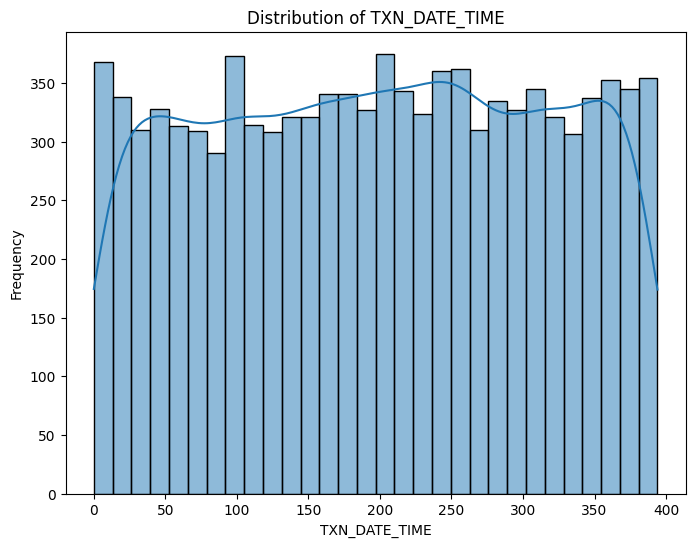

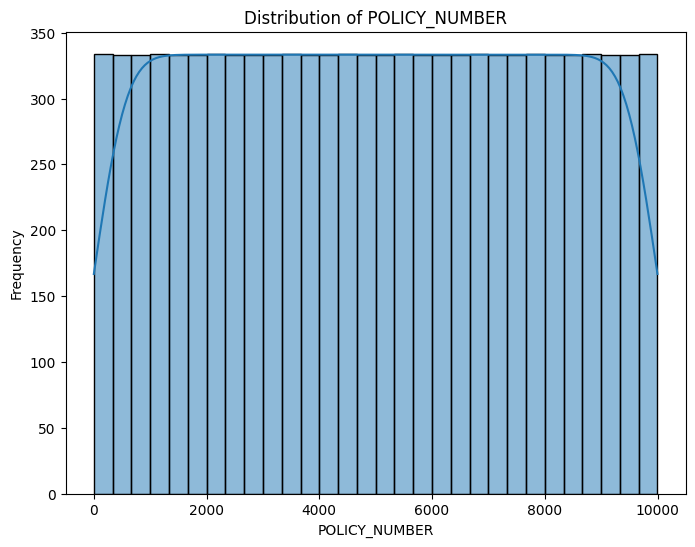

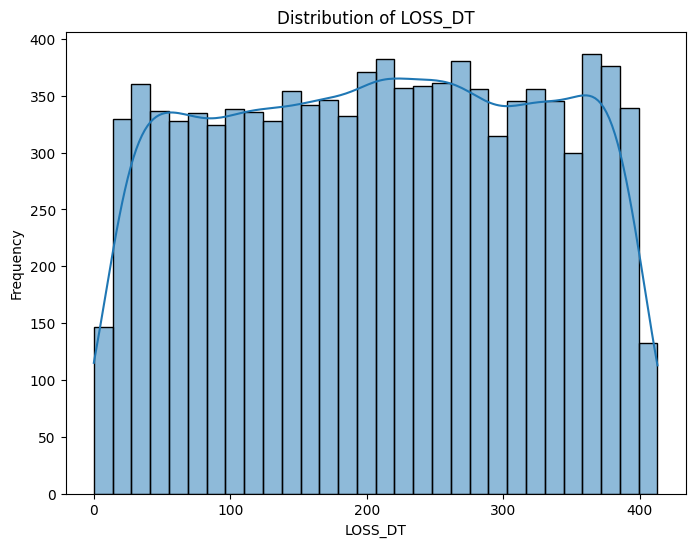

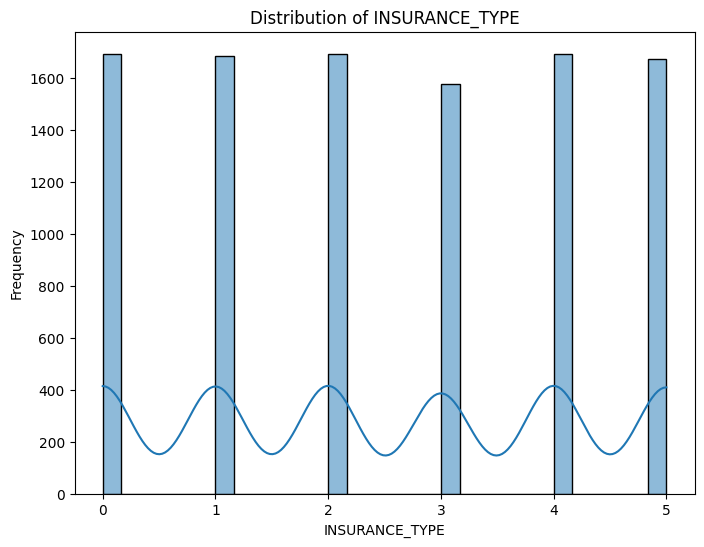

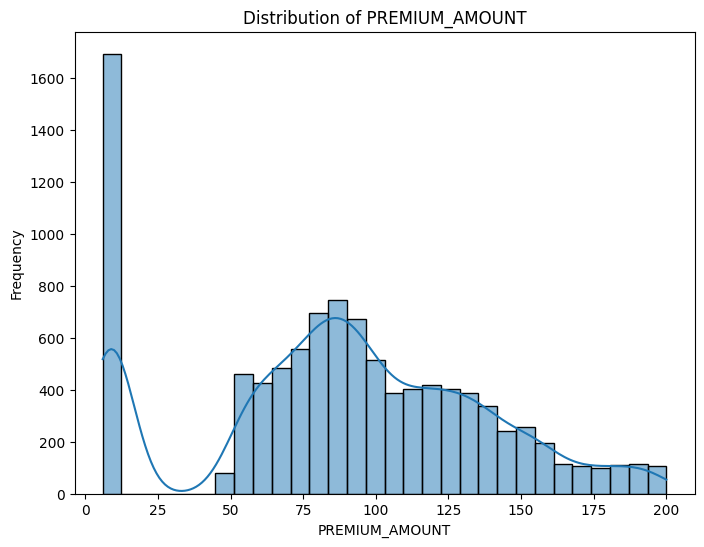

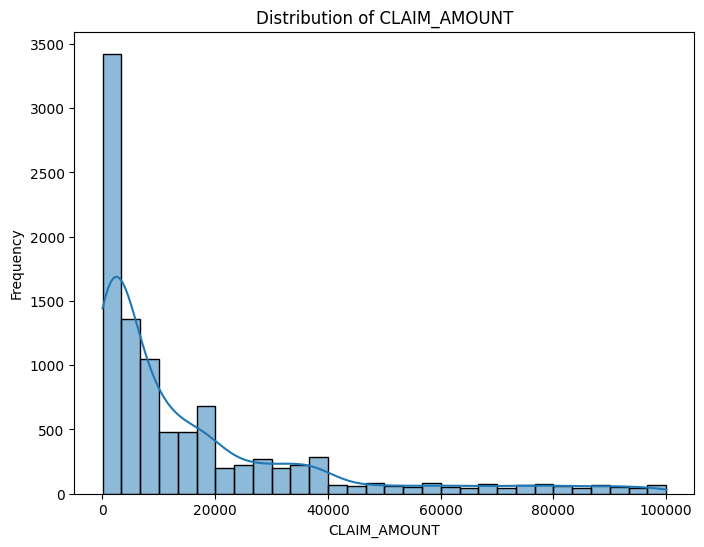

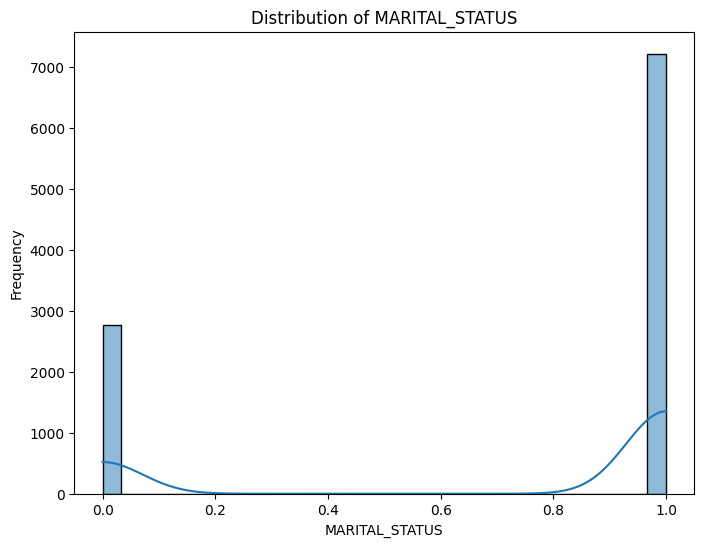

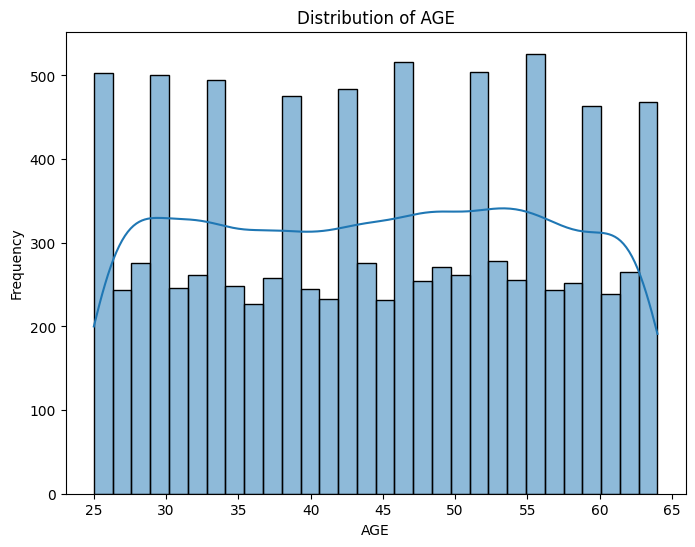

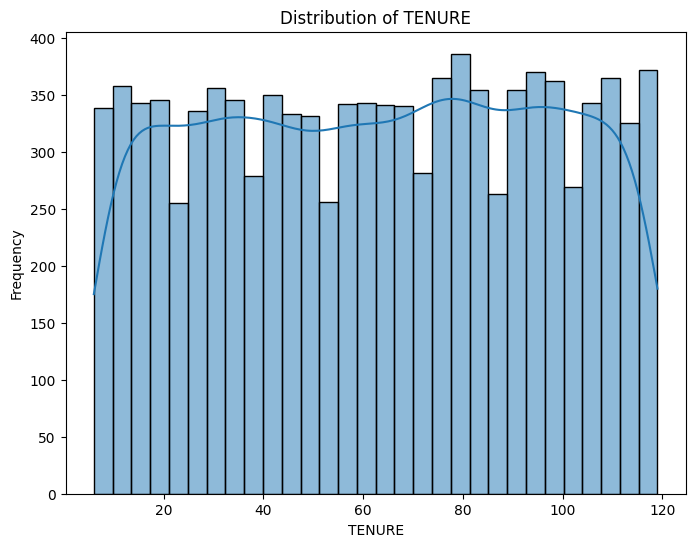

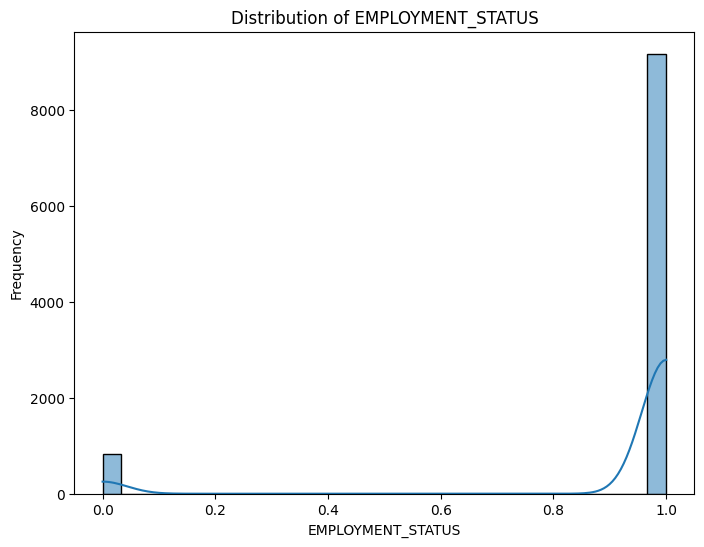

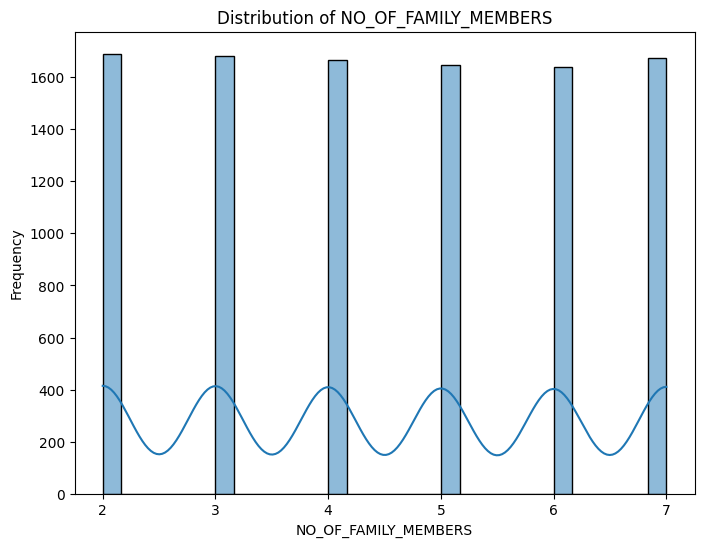

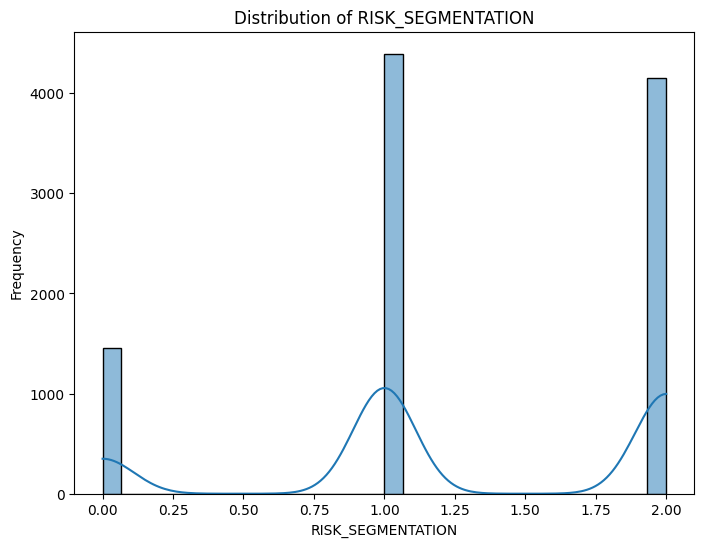

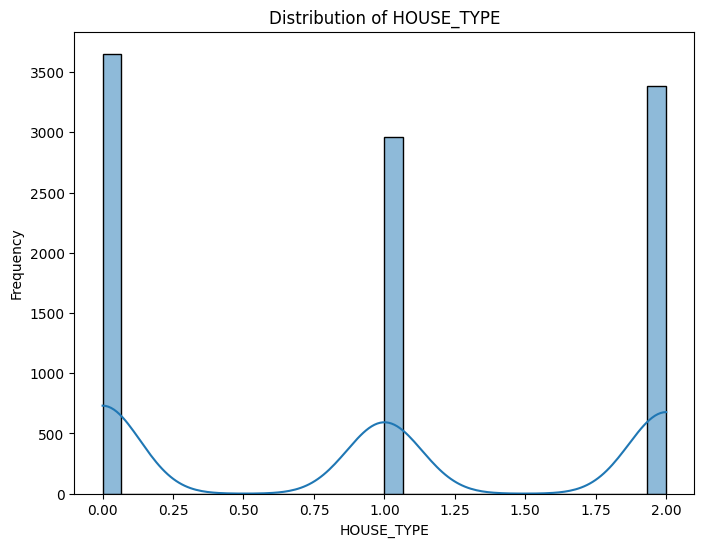

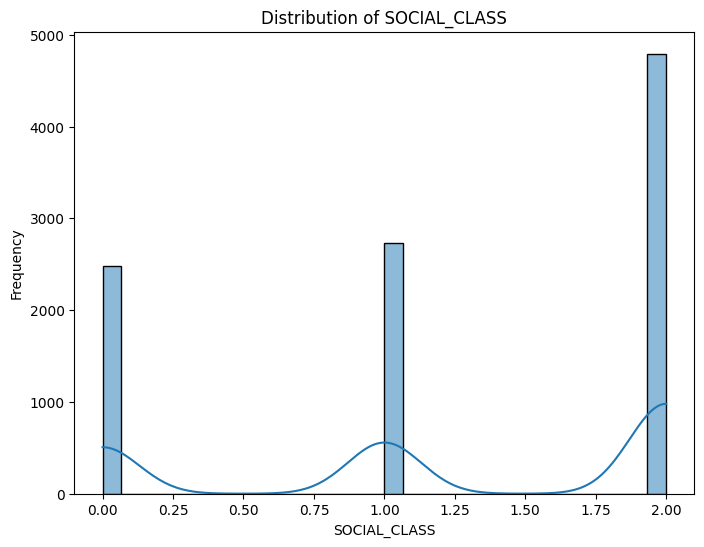

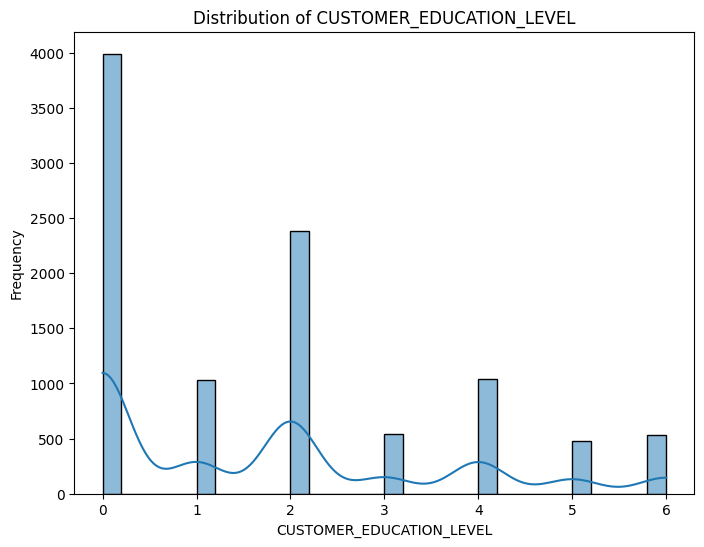

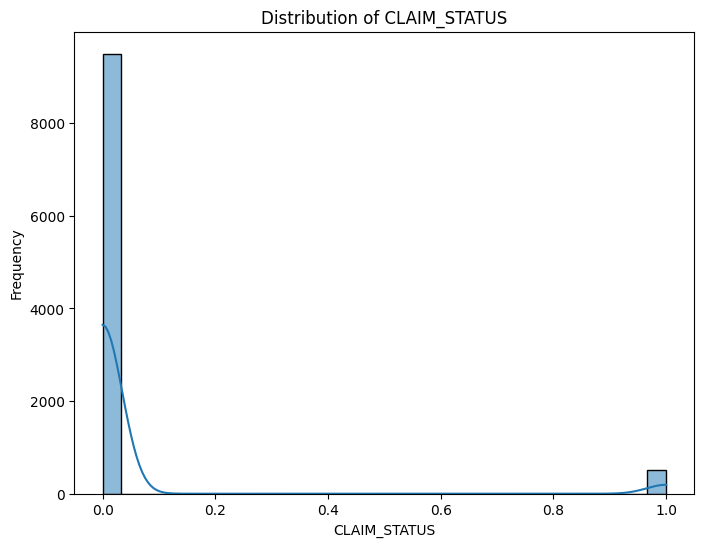

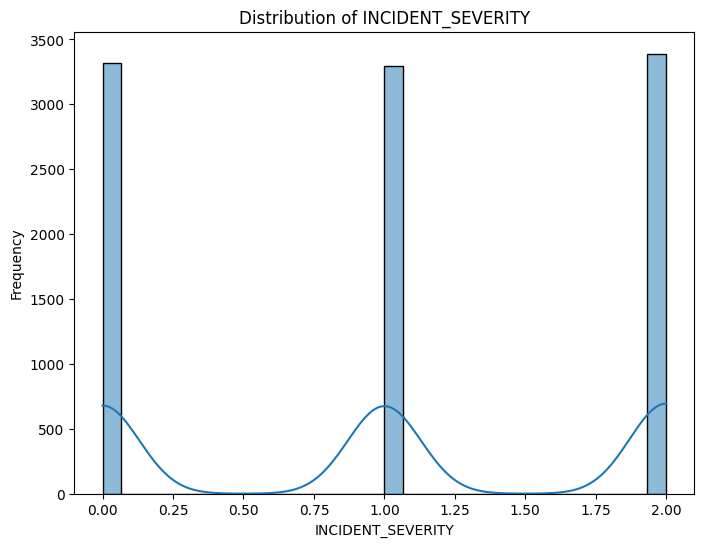

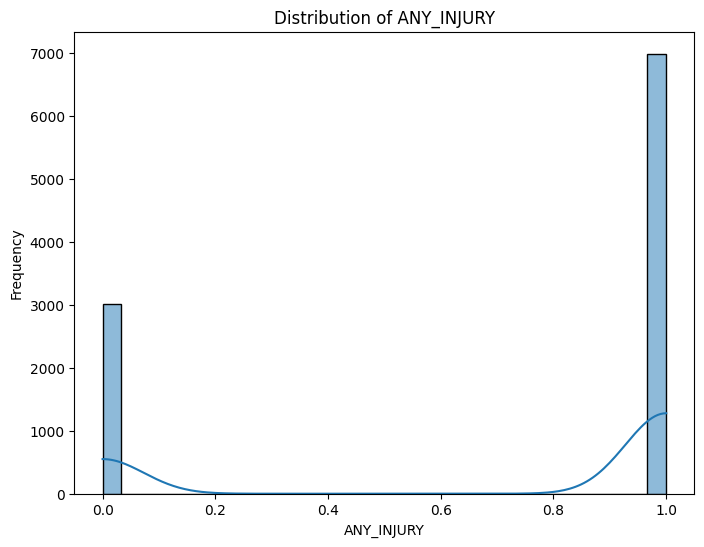

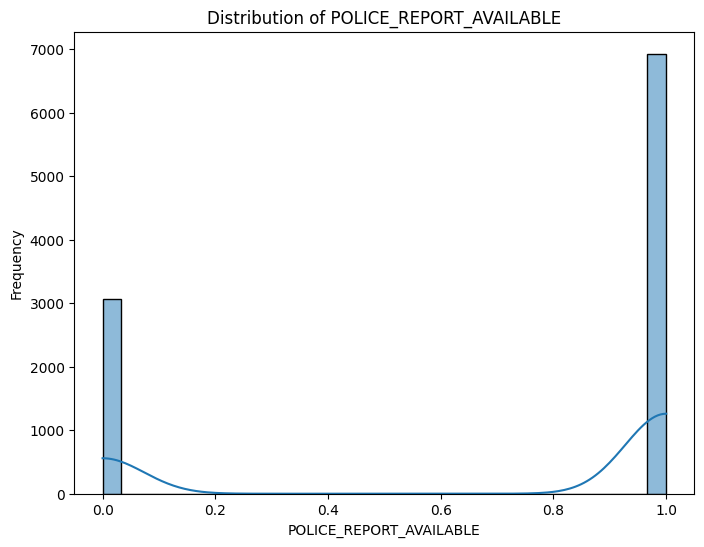

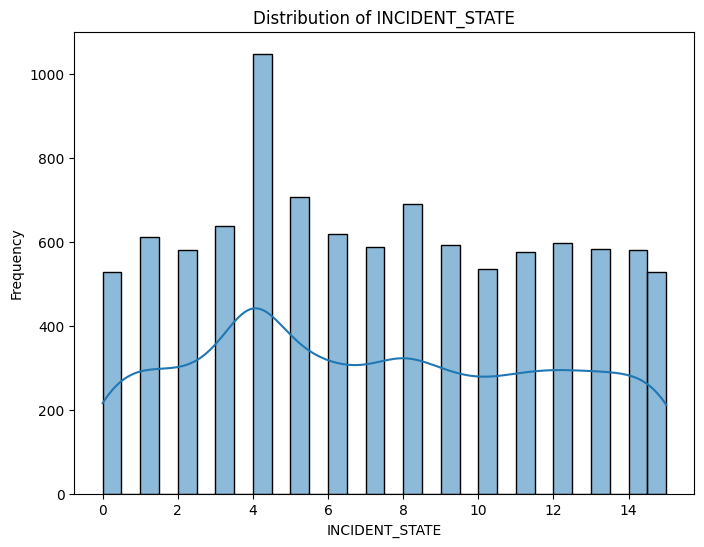

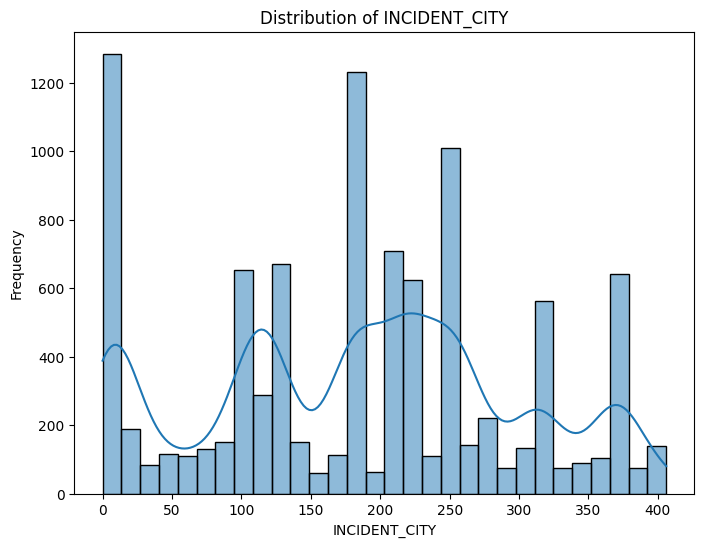

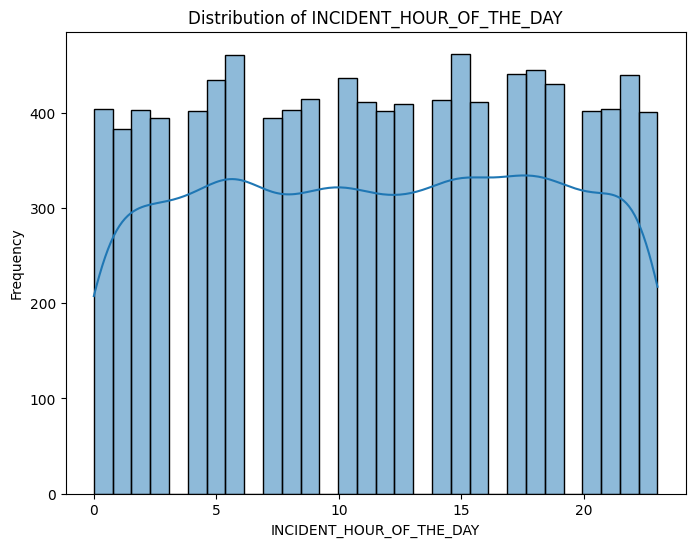

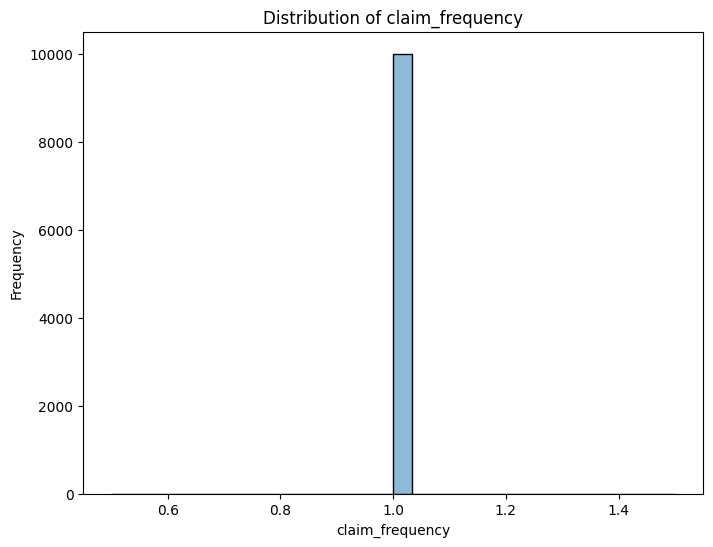

In [ ]:
# Histograms for numerical features
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

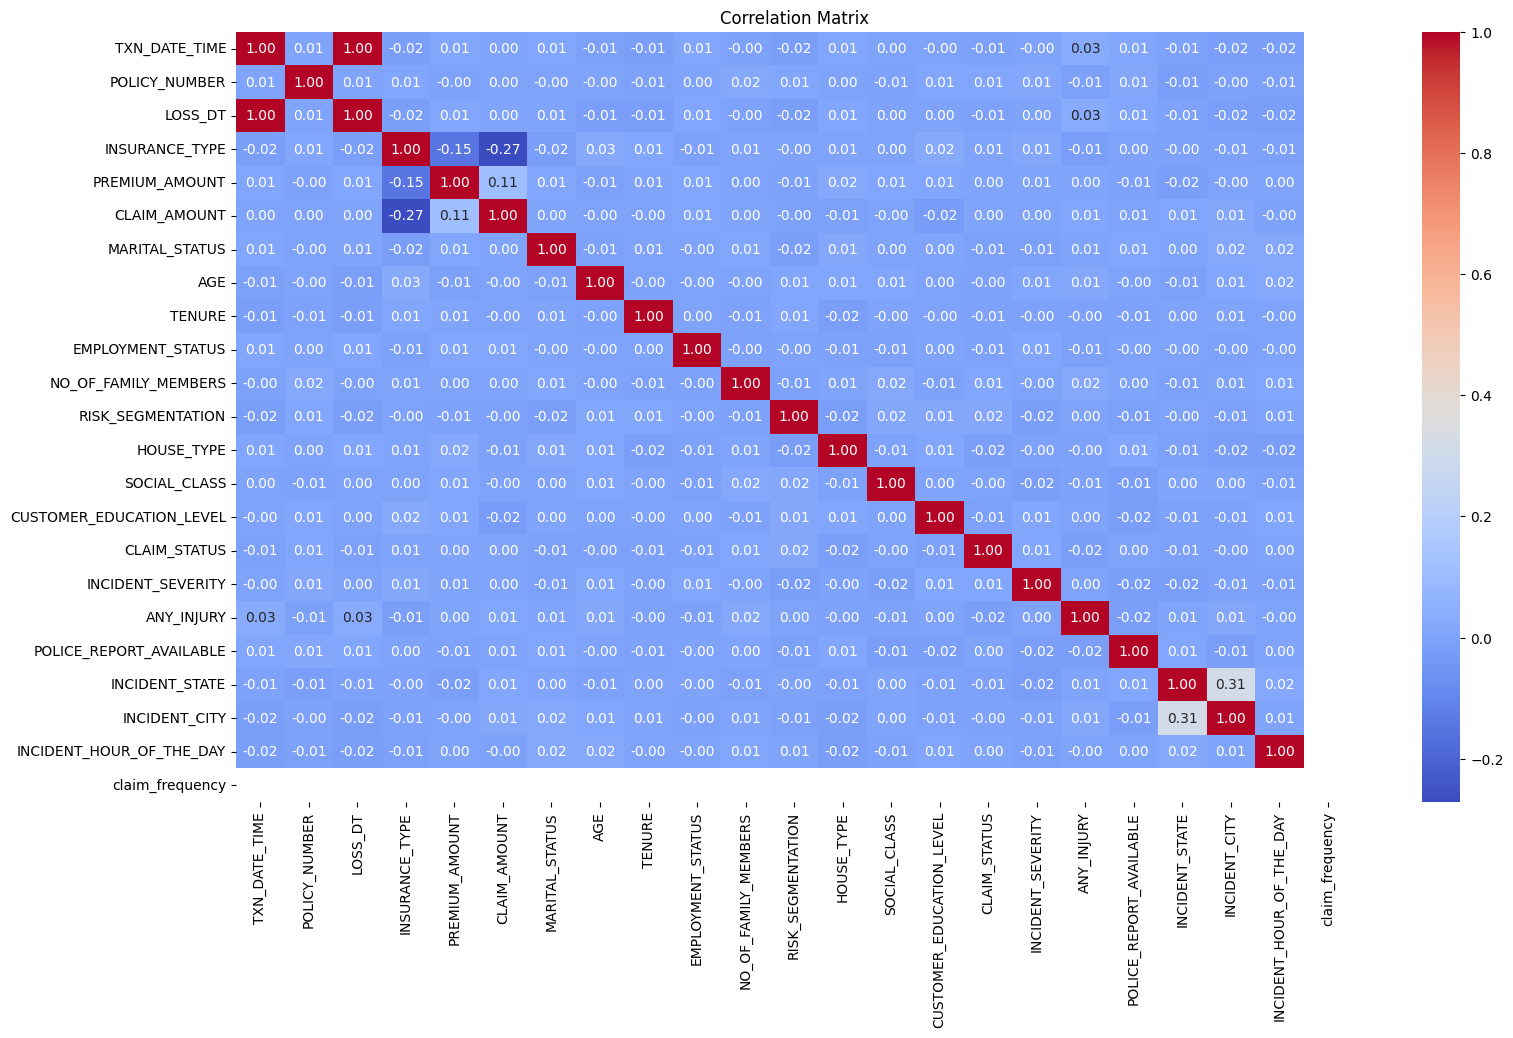

In [ ]:
# Correlation matrix (already in your code, but important)
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

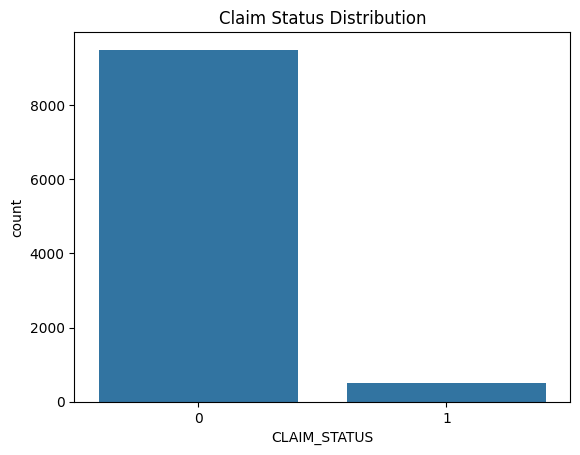

In [ ]:
# Class distribution for the target variable
sns.countplot(x='CLAIM_STATUS', data=data)  # Assuming 'CLAIM_STATUS' is your target
plt.title('Claim Status Distribution')
plt.show()

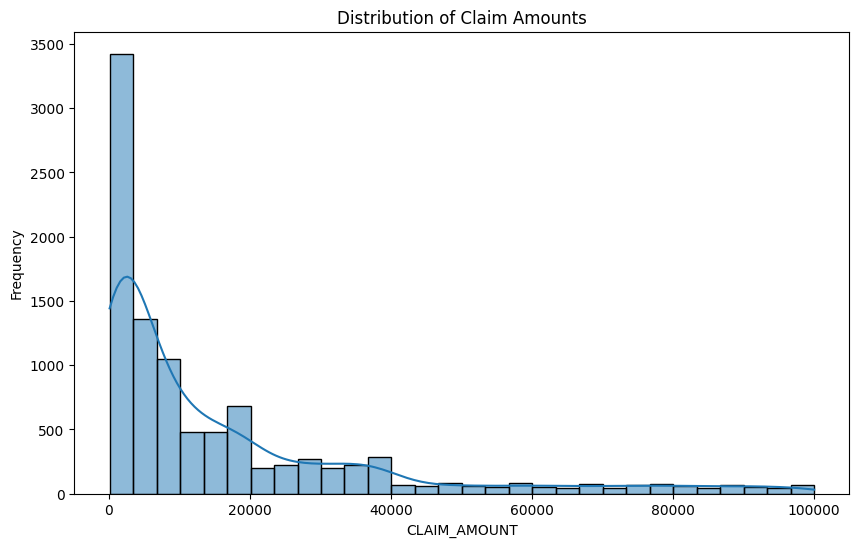

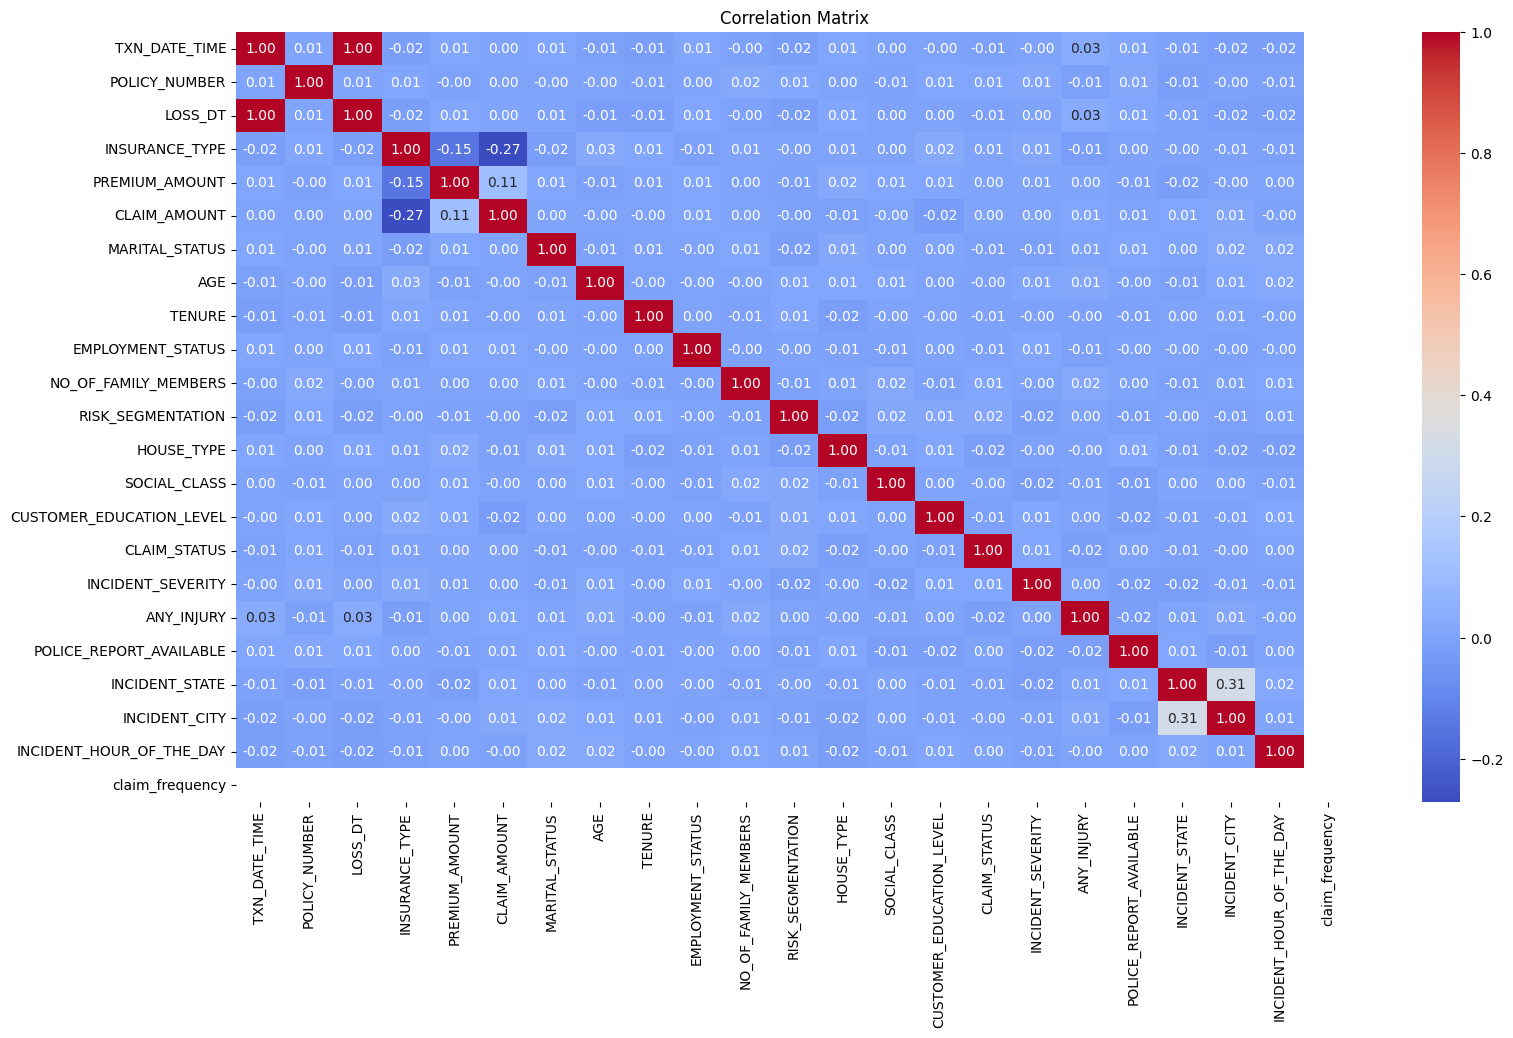

In [ ]:
# Distribution of claims
plt.figure(figsize=(10, 6))
sns.histplot(data['CLAIM_AMOUNT'], bins=30, kde=True)
plt.title('Distribution of Claim Amounts')
plt.xlabel('CLAIM_AMOUNT')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Only select numeric columns
plt.figure(figsize=(18, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Categorical Encoding for all non-numeric columns
categorical_columns = ['INSURANCE_TYPE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS',
                       'RISK_SEGMENTATION', 'HOUSE_TYPE', 'SOCIAL_CLASS',
                       'CUSTOMER_EDUCATION_LEVEL', 'CLAIM_STATUS',
                       'INCIDENT_SEVERITY', 'ANY_INJURY',
                       'POLICE_REPORT_AVAILABLE', 'INCIDENT_STATE',
                       'INCIDENT_CITY', 'age_group']

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

**Hypothesis Testing**

In [ ]:
# Split data into two groups based on CLAIM_STATUS
group1 = data[data['CLAIM_STATUS'] == 0]['AGE']  # Not Approved claims
group2 = data[data['CLAIM_STATUS'] == 1]['AGE']  # Approved claims

# Perform the t-test
t_stat, p_val = ttest_ind(group1, group2)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: AGE has a significant impact on CLAIM_STATUS.")
else:
    print("Fail to reject the null hypothesis: No significant impact.")

T-Statistic: 0.37917485616396057
P-Value: 0.7045660740997662
Fail to reject the null hypothesis: No significant impact.


In [ ]:
# Contingency table for INCIDENT_SEVERITY and CLAIM_STATUS
contingency_table = pd.crosstab(data['INCIDENT_SEVERITY'], data['CLAIM_STATUS'])
print("Contingency Table:")
print(contingency_table)


Contingency Table:
CLAIM_STATUS          0    1
INCIDENT_SEVERITY           
0                  3157  160
1                  3126  167
2                  3214  176


In [ ]:
# Perform chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
if p_val < 0.05:
    print("Reject the null hypothesis: INCIDENT_SEVERITY has a significant impact on CLAIM_STATUS.")
else:
    print("Fail to reject the null hypothesis: No significant impact.")


Chi-Square Stat: 0.4931446144214219
P-Value: 0.7814748532271725
Fail to reject the null hypothesis: No significant impact.


**Model Selection**

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop('CLAIM_STATUS', axis=1)  # Drop target variable from features
y = data['CLAIM_STATUS']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

[[1908    0]
 [  92    0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1908
           1       0.00      0.00      0.00        92

    accuracy                           0.95      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.91      0.95      0.93      2000



In [ ]:
# Neural Network Model
nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate Neural Network
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_accuracy:.2f}')

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7353 - loss: 621.9067 - val_accuracy: 0.8388 - val_loss: 11.7620
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9035 - loss: 8.2092 - val_accuracy: 0.9488 - val_loss: 4.1226
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9063 - loss: 6.3109 - val_accuracy: 0.9513 - val_loss: 11.1246
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9023 - loss: 8.8422 - val_accuracy: 0.8625 - val_loss: 8.7664
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8903 - loss: 10.7190 - val_accuracy: 0.9513 - val_loss: 6.9325
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9030 - loss: 5.5674 - val_accuracy: 0.9400 - val_loss: 4.6140
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9037 - loss: 10.0911 - val_accuracy: 0.6837 - val_loss: 11.7232
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8967 - loss: 9.3800 - val_accur